<a href="https://colab.research.google.com/github/ViktoriaZaremba/DataScienceCourseKNU/blob/main/%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%97%D0%B0%D1%80%D0%B5%D0%BC%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center">
    <div style="height: 0px">
        </div>
    <font size=2 color='black'>
        Київський національний університет імені Тараса Шевченка
    </font>
    <div style="height: 100px">
        </div>
    <img src="https://www.digitalmedia.com.ua/wp-content/uploads/2022/07/logo.png" width="250" height="250">
    <div style="height: 50px">
    </div>
    <font size=6 color='black'>
        Самостійна робота
    </font>
    <br>
    <font size=3 color='black'>
        З Прикладної аналітики при розробці ІТ
    </font>
</div>
<div style="height: 200px">
    </div>
<div style="text-align: right">
    <font size=3 color='black'>
        Виконала:<br>
        студентка групи УП-11<br>
        Заремба Вікторія<br>
        Викладач:<br>
        Єгорченков О.В.,<br>
    </font>
</div>
<div style="height: 100px">
    </div>
<div style="text-align: center">
    <font size=3 color='black'>
        <b>Київ 2022</b>
    </font>
</div>
<div style="height: 00px">
    </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import isnan 
from statistics import mean


# 1. Dataset description

У датасеті відображені дані спостереження за погодніми умовами.
Дані записувались кожні пів години вродовж 19 днів.

Датасет містить такі стовпці:
* day/month - День та місяць
* Time - час спостереження
* Temperature - Температура
* Dew Point - точка роси
* Humidity - вологість
* Wind - Тип вітру (напрямок/штиль)
* Wind Speed - швидкість вітру
* Wind Gust - Пориви вітру
* Pressure - атмофсерний тиск
* Precip.	- опади
* Precip Accum - накопичені опади
* Condition - погодні умови/хмарність

# 2. Data reading




In [2]:
#Підклбючення до гугл-диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Зчитуємо дані
df = pd.read_csv("/content/drive/MyDrive/ШЕВА/Аналіз даних/DATABASE_weather.csv", sep = ';', decimal=',')
df.head()

,day/month,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
0,16.Jul,12:20 AM,72.0,57,60%,VAR,1 mph,0 mph,29.6,0,0.0,Fair
1,16.Jul,12:50 AM,73.0,57,57%,W,3 mph,0 mph,29.6,0,0.0,Fair
2,16.Jul,1:20 AM,75.0,57,53%,CALM,0 mph,0 mph,29.6,0,0.0,Fair
3,16.Jul,1:50 AM,72.0,57,60%,CALM,0 mph,0 mph,29.6,0,0.0,Fair
4,16.Jul,2:20 AM,72.0,57,60%,CALM,0 mph,0 mph,29.5,0,0.0,Fair


# 3. Data tidying.

Переглянемо підсумок датасету

In [4]:
df.describe()

,Temperature,Dew Point,Pressure,Precip.,Precip Accum
count,1368.000000,1380.000000,1380.000000,1380.0,1188.0
mean,81.912281,58.879710,29.515362,0.0,0.0
std,6.237407,5.730472,0.096247,0.0,0.0
min,64.000000,41.000000,29.300000,0.0,0.0
25%,77.000000,55.000000,29.400000,0.0,0.0
50%,82.000000,59.000000,29.500000,0.0,0.0
75%,86.000000,64.000000,29.600000,0.0,0.0
max,100.000000,70.000000,29.700000,0.0,0.0


перевіряємо на наявність Nan значень


In [5]:
df.isna().sum()

day/month         0
Time              0
Temperature      12
Dew Point         0
Humidity          0
Wind              0
Wind Speed        0
Wind Gust         0
Pressure          0
Precip.           0
Precip Accum    192
Condition         0
dtype: int64

In [6]:
df.dtypes

day/month        object
Time             object
Temperature     float64
Dew Point         int64
Humidity         object
Wind             object
Wind Speed       object
Wind Gust        object
Pressure        float64
Precip.           int64
Precip Accum    float64
Condition        object
dtype: object

Nanʼи є в 2 колонках з температурою та накопиченої вологою. 
В колонці з температурою замінимо пропущені значення на середню температуру до і після замірів, тобто пів години до і пів години після

In [7]:
for i in range(df.shape[0]):
  if isnan(df['Temperature'][i]):
    if i == 0:
      df['Temperature'][i] = df['Temperature'][i+1]
    elif i == df.shape[0]-1:
      df['Temperature'][i] = df['Temperature'][i-1]
    else:
      df['Temperature'][i] = (df['Temperature'][i-1] + df['Temperature'][i+1])/2



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Перевіряємо чи залишились пусті значення

In [8]:
df['Temperature'].isna().sum()

0

З опису датафрейму бачимо, що в стовпці "Precip Accum" лише нулі.
Тому усі пусті значення можемо також замунити на 0


In [9]:
df['Precip Accum'] = df['Precip Accum'].fillna(0)

In [10]:
df.isna().sum()

day/month       0
Time            0
Temperature     0
Dew Point       0
Humidity        0
Wind            0
Wind Speed      0
Wind Gust       0
Pressure        0
Precip.         0
Precip Accum    0
Condition       0
dtype: int64

Перейменовуємо колонку день і місяць на повну дату


In [11]:
df = df.rename(columns={"day/month": "Date"})

Перетворюємо усі одиниці вимірбвання в більш звичні для нас:
*   Додамо до дати ще й рік
*   Час перетворимо в формат год:хв



In [12]:
df['Date'] = pd.to_datetime(df["Date"] + ".2019")
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M')

Усі можливі значення перетворимо в числові (швидкість вітру та вологість)

In [13]:
colums = ['Wind Speed', 'Wind Gust','Humidity']
for c in colums:
  df[c] = df[c].map(lambda x: x.strip(' mph%'))
  df[c] = df[c].astype(int)
df


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
0,2019-07-16,00:20,72.0,57,60,VAR,1,0,29.6,0,0.0,Fair
1,2019-07-16,00:50,73.0,57,57,W,3,0,29.6,0,0.0,Fair
2,2019-07-16,01:20,75.0,57,53,CALM,0,0,29.6,0,0.0,Fair
3,2019-07-16,01:50,72.0,57,60,CALM,0,0,29.6,0,0.0,Fair
4,2019-07-16,02:20,72.0,57,60,CALM,0,0,29.5,0,0.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2019-08-13,21:50,77.0,50,39,VAR,2,0,29.6,0,0.0,Fair
1376,2019-08-13,22:20,77.0,48,36,VAR,1,0,29.6,0,0.0,Fair
1377,2019-08-13,22:50,73.0,50,44,N,13,0,29.6,0,0.0,Fair
1378,2019-08-13,23:20,73.0,50,44,N,7,0,29.6,0,0.0,Fair


Для подальшої візуалізації перетворюємо дату в індекс

In [14]:
df.set_index('Date')

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum,Condition
Date,,,,,,,,,,,
2019-07-16,00:20,72.0,57,60,VAR,1,0,29.6,0,0.0,Fair
2019-07-16,00:50,73.0,57,57,W,3,0,29.6,0,0.0,Fair
2019-07-16,01:20,75.0,57,53,CALM,0,0,29.6,0,0.0,Fair
2019-07-16,01:50,72.0,57,60,CALM,0,0,29.6,0,0.0,Fair
2019-07-16,02:20,72.0,57,60,CALM,0,0,29.5,0,0.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-13,21:50,77.0,50,39,VAR,2,0,29.6,0,0.0,Fair
2019-08-13,22:20,77.0,48,36,VAR,1,0,29.6,0,0.0,Fair
2019-08-13,22:50,73.0,50,44,N,13,0,29.6,0,0.0,Fair


In [15]:
df.describe()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.0,1380.0
mean,81.904710,58.879710,48.086232,10.133333,2.004348,29.515362,0.0,0.0
std,6.250379,5.730472,15.832580,7.663115,8.349333,0.096247,0.0,0.0
min,64.000000,41.000000,13.000000,0.000000,0.000000,29.300000,0.0,0.0
25%,77.000000,55.000000,35.000000,3.000000,0.000000,29.400000,0.0,0.0
50%,82.000000,59.000000,47.000000,9.000000,0.000000,29.500000,0.0,0.0
75%,86.000000,64.000000,58.000000,15.000000,0.000000,29.600000,0.0,0.0
max,100.000000,70.000000,88.000000,37.000000,55.000000,29.700000,0.0,0.0


# 4. Data analyzing with graphics.

Співвідношення швидкості вітру та поривів вітру.
Також виділимо на графіку оптимальний вітер для польотів на параплані. Як бачимо це лише 2 дні за весь період

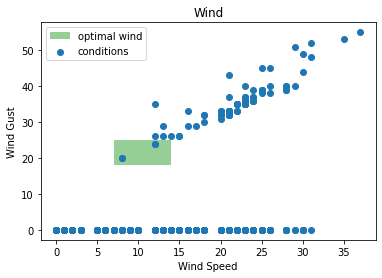

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Gust')
ax.set_title('Wind')
ax.broken_barh([(7,7),(18,0)],(18,7), facecolors = 'tab:green', alpha = 0.5, label = 'optimal wind')
ax.scatter(df['Wind Speed'], df['Wind Gust'], label = 'conditions')
ax.legend()


Відобразимо максимальні і мінімальні температури за період

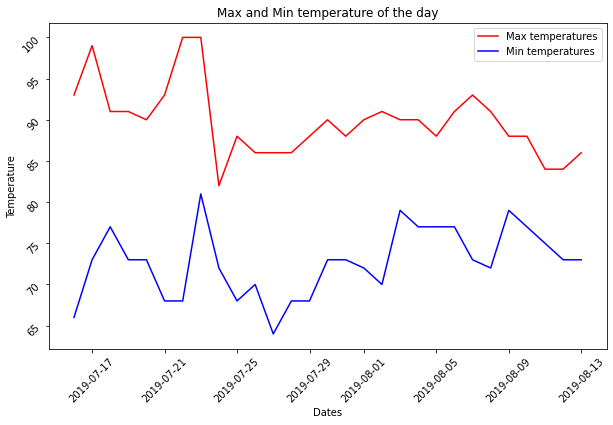

In [17]:
t_max = df.groupby('Date').agg({'Temperature':'max'})
t_min = df.groupby('Date').agg({'Temperature':'min'})
col = [t_max, t_min]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t_max, color = 'red', label = 'Max temperatures')
ax.plot(t_min, color = 'blue', label = 'Min temperatures')
ax.set_title('Max and Min temperature of the day')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature')
ax.tick_params(labelrotation=45)
ax.legend()

Відобразимо макимальні показники у вигляді згрупованого барплоту

Text(0.5, 1.0, 'Порівняння вимірів')

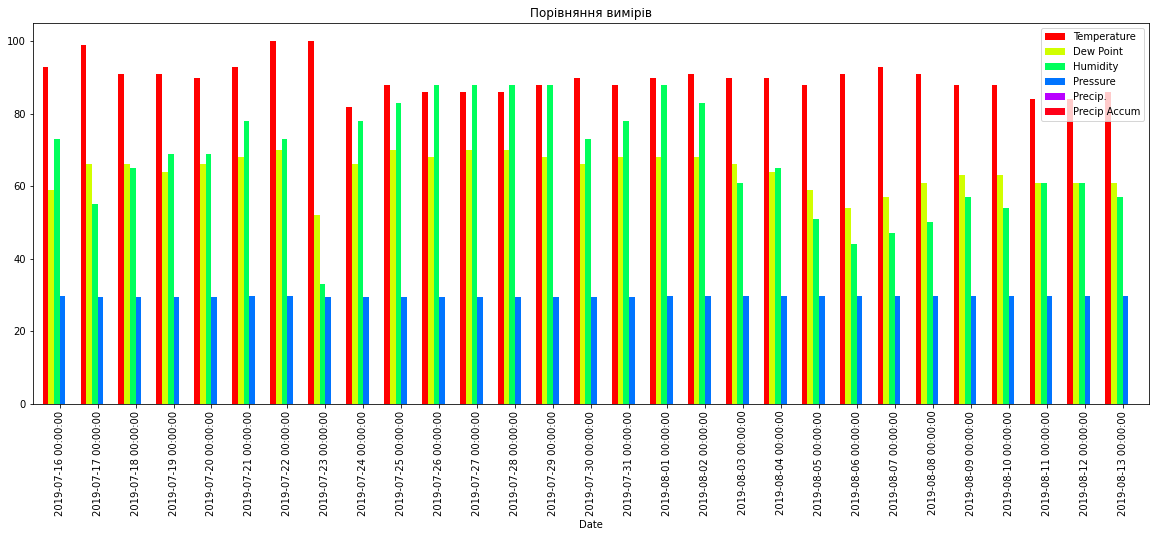

In [18]:
col2 = [df['Temperature'], df['Dew Point'], df['Humidity'], df['Pressure'], df['Precip.'], df['Precip Accum']]
vol = df.groupby('Date').agg({'Temperature':'max', 'Dew Point':'max', 'Humidity':'max', 'Pressure':'max', 'Precip.':'max', 'Precip Accum':'min'})
vol.plot.bar(colormap='hsv', width = 0.9, figsize = (20,7))
plt.title('Порівняння вимірів')

Відобразимо "розу вітрів" у вигляді барплоту. Покажемо на графіку частоту різних напрямків вітру

Text(0, 0.5, 'frequency')

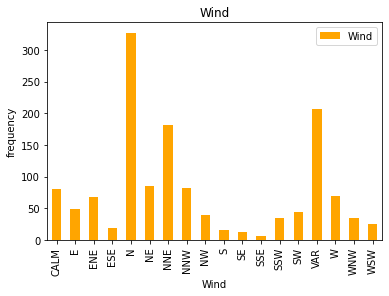

In [19]:
w = df.groupby('Wind').agg({'Wind':'count'})
ax = w.plot.bar(color = 'orange')
ax.set_title('Wind')
ax.set_ylabel('frequency')

Створимо діаграму-пиріг (pie plot) щоб відобразити кількість днів з різними погодними умовами. Як бачимо переважає хороша погода.

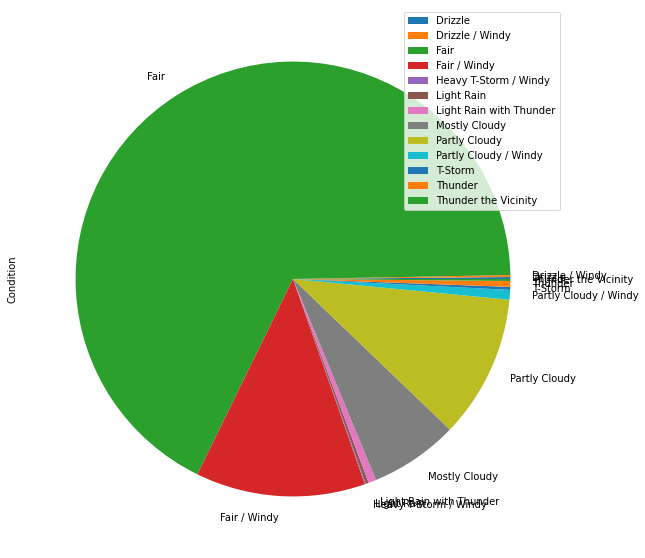

In [20]:
cond = df.groupby('Condition').agg({'Condition':'count'})
cond.plot.pie(y = 'Condition', figsize = (10,10))

Скористуємось іншоб бібліотекою для створення точкової діаграми. Відобразимо задежність між швидкістю і поривами вітру. Різними кольорами позначений різний вітер, а різний розмір відповідає за різну темиературу.

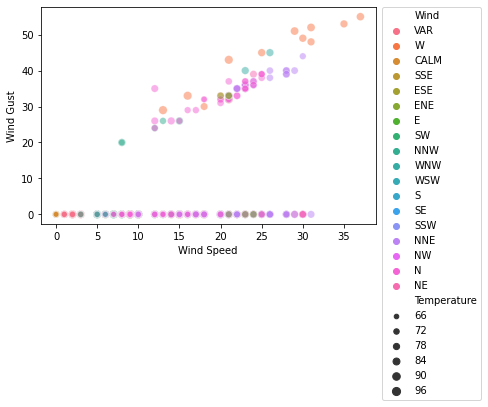

In [21]:
ax = sns.scatterplot(x = df['Wind Speed'], y = df['Wind Gust'], alpha = 0.5, hue = df['Wind'], size = df['Temperature'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


Створимо ще один подібний графік, але скористаємось цікавішою бібліотекою. Тут графіки більш інтерактивні і при наведенні відображають усю інформацію про конкрутку "крапку". 

Також якщо на цьому графіку відображати оусі запити - багато інформації накладається. Тому створимо ще один графік де згрупуємо інформацію по днях.

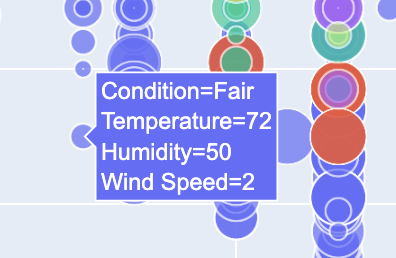

In [22]:
import plotly.express as px



fig = px.scatter(df, x='Temperature', y="Humidity",
	         size="Wind Speed", color="Condition", size_max=60)
fig.show()



In [23]:
import plotly.express as px


max_temp = df.groupby('Date').agg({'Temperature':'max'})
max_hum = df.groupby('Date').agg({'Humidity':'max'})
max_wind = df.groupby('Date').agg({'Wind Speed':'max'})
max_cond = df.groupby('Date')['Condition'].agg(pd.Series.mode)

fig = px.scatter(df, x=max_temp.iloc[:,-1], y=max_hum.iloc[:,-1],
	         size=max_wind.iloc[:,-1], color=max_cond, size_max=60, labels = {"x":'Temperature', "y":'Humidity', 'size':'Wind Speed', 'color':"Condition"})
fig.show()

